In [10]:
import numpy as np
import matplotlib.pyplot as plt
import mpmath
from scipy.special import gammainc
import seaborn as sns
import allel
import pandas as pd
from sklearn import metrics

In [3]:
#Function to calculate recombination fraction from recombination rate and distance from focal locus
def get_recFrac(r, dist):
    d = r * dist
    rf = 0.5*(1-(np.exp(-2*d)))
    return(rf)

In [4]:
#Function to get reduction in h from alpha, the strength of selection, and the recombination fraction.
def get_h_reduction(alpha, s, rf):
    gi_arg1 = -((2*rf)/s)
    gi_arg2 = 1/alpha
    gi_res = np.float64(mpmath.gammainc(gi_arg1, gi_arg2))
    left_side = ((2*rf)/s) * (alpha**((-2*rf)/s))
    h = left_side * gi_res
    return(h)

In [5]:
#Function to get reduction in pi from alpha (2Nes), Ne, mu, r, t (time since fixation of beneficial mutation),
#and distance from focal locus
def get_pi_reduction(alpha, Ne, mu, r, t, dist):
    s = alpha / (2 * Ne)
    theta = 4 * Ne * mu
    rf = get_recFrac(r, dist)
    h = get_h_reduction(alpha, s, rf)
    pi = theta * (1-(1-h)*np.exp((-t)/(2*Ne)))
    return(pi)

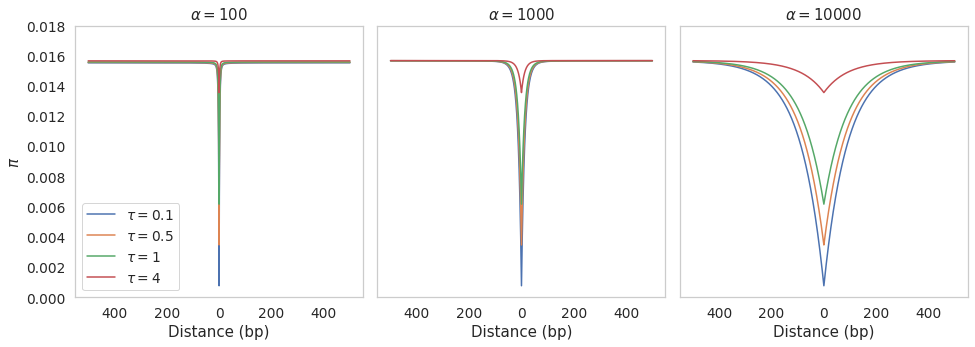

In [17]:
sns.set(rc={'figure.figsize':(16,5),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
#Set x axis limit (also how far from focal locus to estimate reduction for)
xlims = [500, 500, 500]
#Loop through alpha values
for i, alpha in enumerate([100, 1000, 10000]):
    plt.subplot(1,3, i+1)
    Ne = 1.4e6
    mu = 2.8e-9
    ro = 2.32e-6
    t = 0.1

    #Use xlims to calculate distances from focal locus  
    dist = [x for x in range(0, xlims[i]+1)]
    #Calculate reduction in diversity for each value in dist
    pi = [get_pi_reduction(alpha, Ne, mu, ro, t*Ne, x) for x in dist]
    #Copy pi and flip it (for reduction in diversity to the left of the focal locus)
    pi2 = pi.copy()
    pi2.reverse()
    p = pi2[:-1] + pi
    dist = [x for x in range(-xlims[i], xlims[i]+1)]
    #Plot
    plt.plot(dist, p, label=r'$\tau =$' + str(t))
    
    #Repeat for t=0.5
    t = 0.5

    dist = [x for x in range(0, xlims[i]+1)]
    pi = [get_pi_reduction(alpha, Ne, mu, ro, t*Ne, x) for x in dist]
    pi2 = pi.copy()
    pi2.reverse()
    p = pi2[:-1] + pi
    dist = [x for x in range(-xlims[i], xlims[i]+1)]
    plt.plot(dist, p, label=r'$\tau =$' + str(t))

    #Repeat for t = 1
    t = 1

    dist = [x for x in range(0, xlims[i]+1)]
    pi = [get_pi_reduction(alpha, Ne, mu, ro, t*Ne, x) for x in dist]
    pi2 = pi.copy()
    pi2.reverse()
    p = pi2[:-1] + pi
    dist = [x for x in range(-xlims[i], xlims[i]+1)]
    plt.plot(dist, p, label=r'$\tau =$' + str(t))

    #Repeat for t = 4
    t = 4

    dist = [x for x in range(0, xlims[i]+1)]
    pi = [get_pi_reduction(alpha, Ne, mu, ro, t*Ne, x) for x in dist]
    pi2 = pi.copy()
    pi2.reverse()
    p = pi2[:-1] + pi
    dist = [x for x in range(-xlims[i], xlims[i]+1)]
    plt.plot(dist, p, label=r'$\tau =$' + str(t))
    plt.xticks([-400, -200, 0, 200, 400], [400, 200, 0, 200, 400])
    plt.xlabel('Distance (bp)')
    if(i==0):
        plt.legend()
        plt.ylabel(r'$\pi$')
    else:
        plt.yticks([])
        
    plt.ylim([0, 0.018])
        
    plt.title(r'$\2N_es =$' + str(alpha))
    
#Adjust spacing between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.1)